# Análisis de componentes principales
- Nombres
- Matrícula
- Semana
- Profesor

Declaramos las librerias que vamos a ocupar.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.options.display.float_format = '{:,.2f}'.format

El primer paso es hacer la descarga de la información que en este caso es un URL el cual pasaremos a un DataFrame

In [77]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df_original = pd.read_csv(url, header= 0, index_col='ID')
df_original.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Hemos notado que las variables demográficas que describen a nuestra observación son desde X2 hasta X5. Y las demás describen la deuda con sus pagos mensuales y su nivel de crédito.

La variable target para nosotros es $y$ que describe si fue o no realizado el pago.

# EDA

In [78]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [79]:
df_original.isnull().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Al ver que tenemos un nivel de datos de 30,000 registros, las columnas que tienen valores NaN o vacíos son marginales por lo que para no contaminar el resto de la información las eliminaremos del dataset.

In [80]:
df_original.dropna(axis=0, inplace=True)
df_original.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [81]:
df_original.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

Una vez que tenemos el dataframe limpio de nulos toca ver si es que la información que se tiene tiene algún dato atípico (outliers) con su función de masa de probabilidad.

array([[<AxesSubplot: title={'center': 'X1'}>,
        <AxesSubplot: title={'center': 'X2'}>,
        <AxesSubplot: title={'center': 'X3'}>,
        <AxesSubplot: title={'center': 'X4'}>,
        <AxesSubplot: title={'center': 'X5'}>],
       [<AxesSubplot: title={'center': 'X6'}>,
        <AxesSubplot: title={'center': 'X7'}>,
        <AxesSubplot: title={'center': 'X8'}>,
        <AxesSubplot: title={'center': 'X9'}>,
        <AxesSubplot: title={'center': 'X10'}>],
       [<AxesSubplot: title={'center': 'X11'}>,
        <AxesSubplot: title={'center': 'X12'}>,
        <AxesSubplot: title={'center': 'X13'}>,
        <AxesSubplot: title={'center': 'X14'}>,
        <AxesSubplot: title={'center': 'X15'}>],
       [<AxesSubplot: title={'center': 'X16'}>,
        <AxesSubplot: title={'center': 'X17'}>,
        <AxesSubplot: title={'center': 'X18'}>,
        <AxesSubplot: title={'center': 'X19'}>,
        <AxesSubplot: title={'center': 'X20'}>],
       [<AxesSubplot: title={'center': 'X21'}

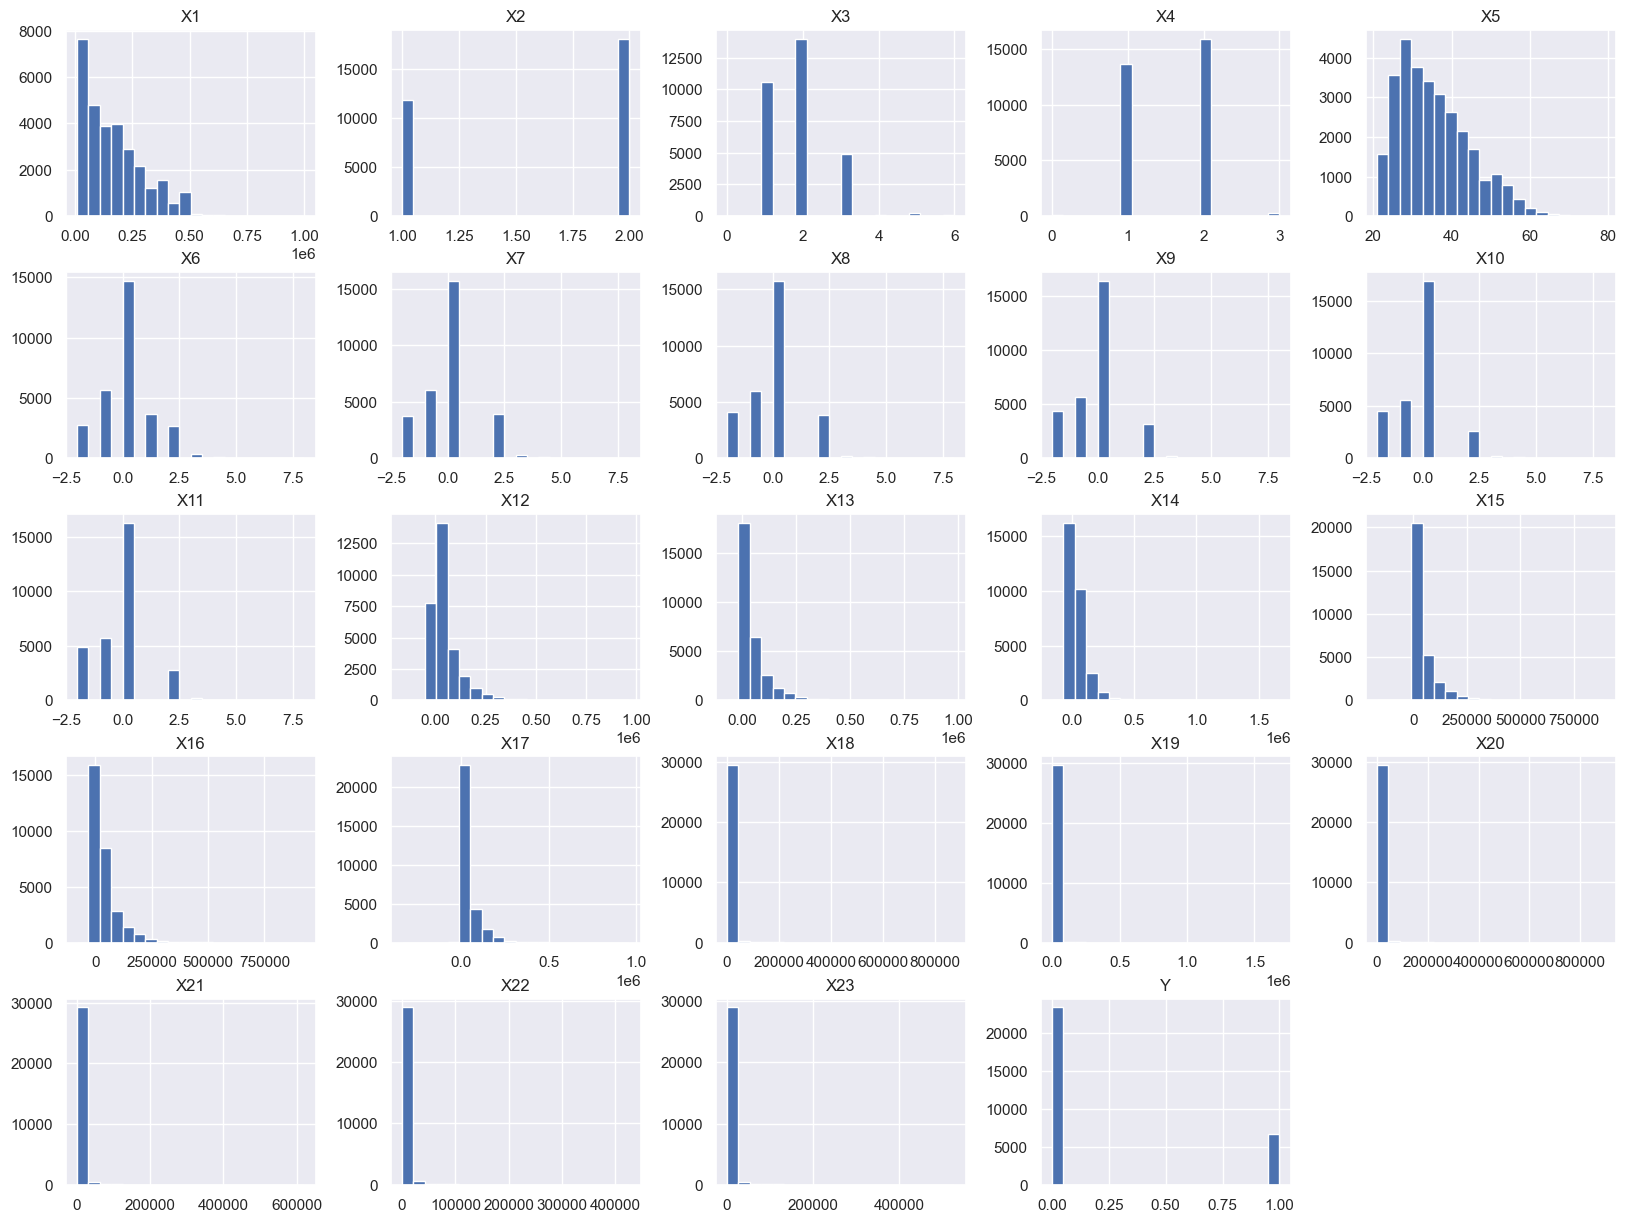

In [82]:
df_original.hist(figsize= (20, 15), bins= 20)

Viendo el histograma de las variables notamos que hay valores extremos en los últimos $X_n$ por lo que veremos como es que se están llevando esos valores la estratificación de nuestra variable objetivo ya que hay que saber si son errores los outliers o realmente están representando el comportamiento que buscamos predecir. 

Y al ser tan pocos nuestros valores de Y = 1 entonces tenemos que tomar en consideración que los que no pagan son pocos pero deben montos mayores. para confirmar esta hipótesis primero veremos los datos con su estratificación dada por la columna $Y$

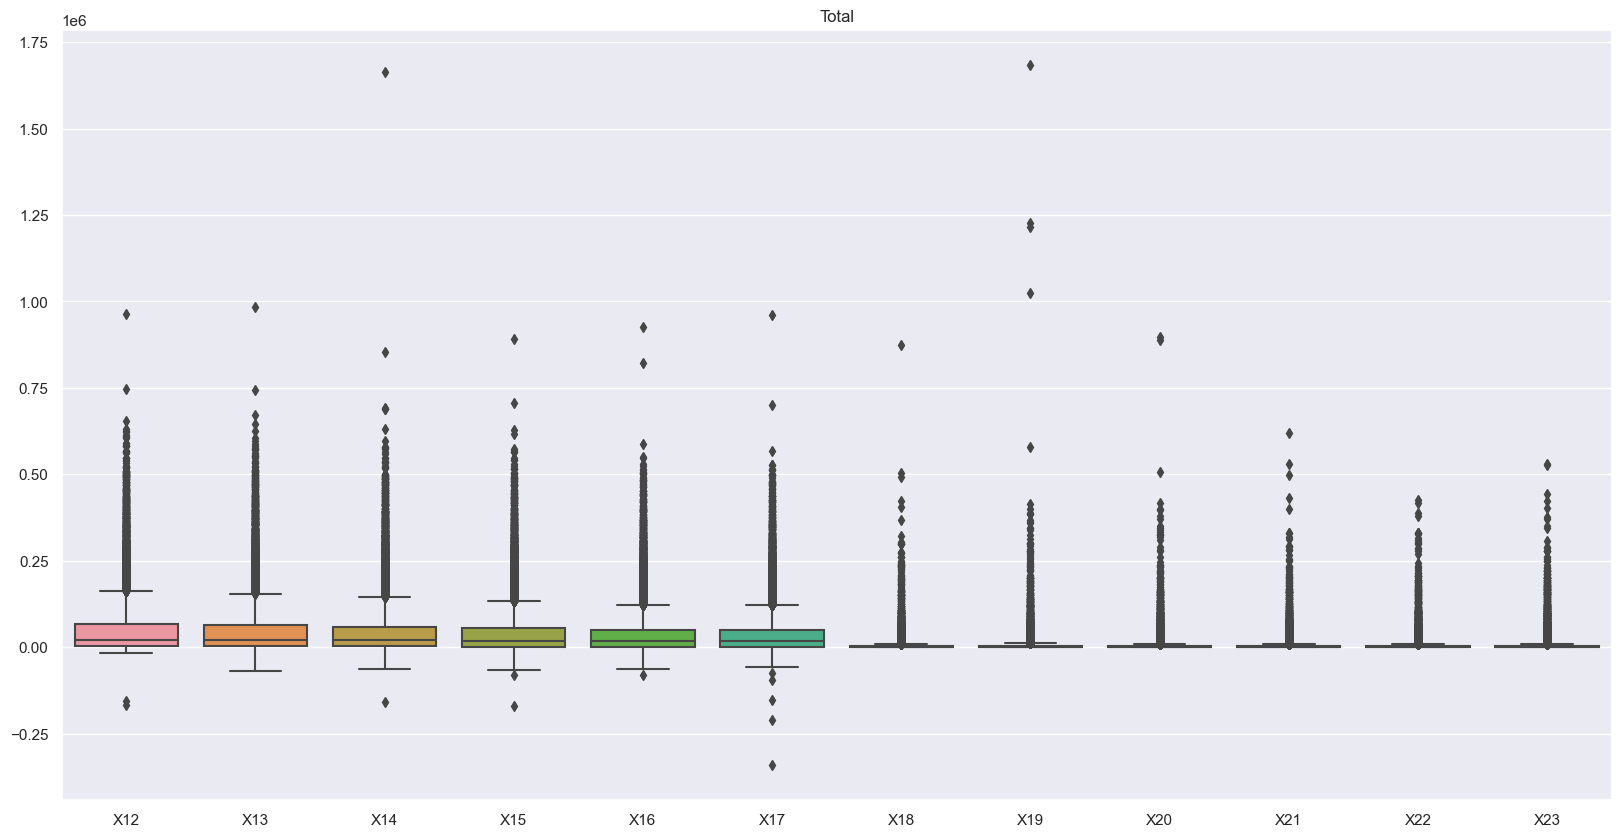

In [83]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sns.boxplot(df_original[['X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20','X21', 'X22', 'X23']], orient='v')
_ = plt.title("Total")

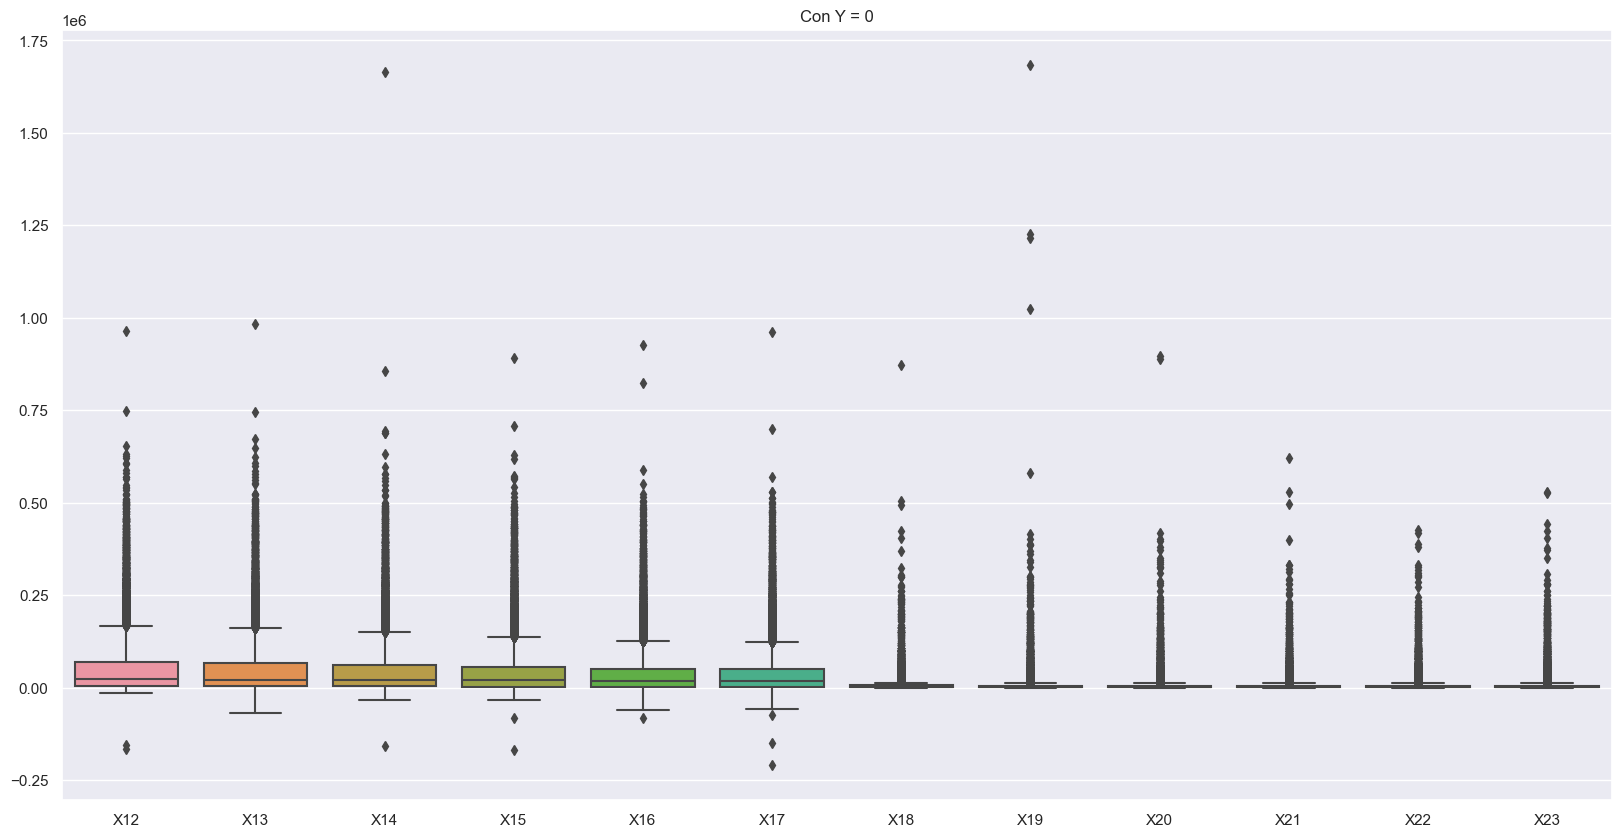

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sns.boxplot(df_original.loc[df_original.Y == 0 , ['X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20','X21', 'X22', 'X23']], orient='v')
_ = plt.title("Con Y = 0")


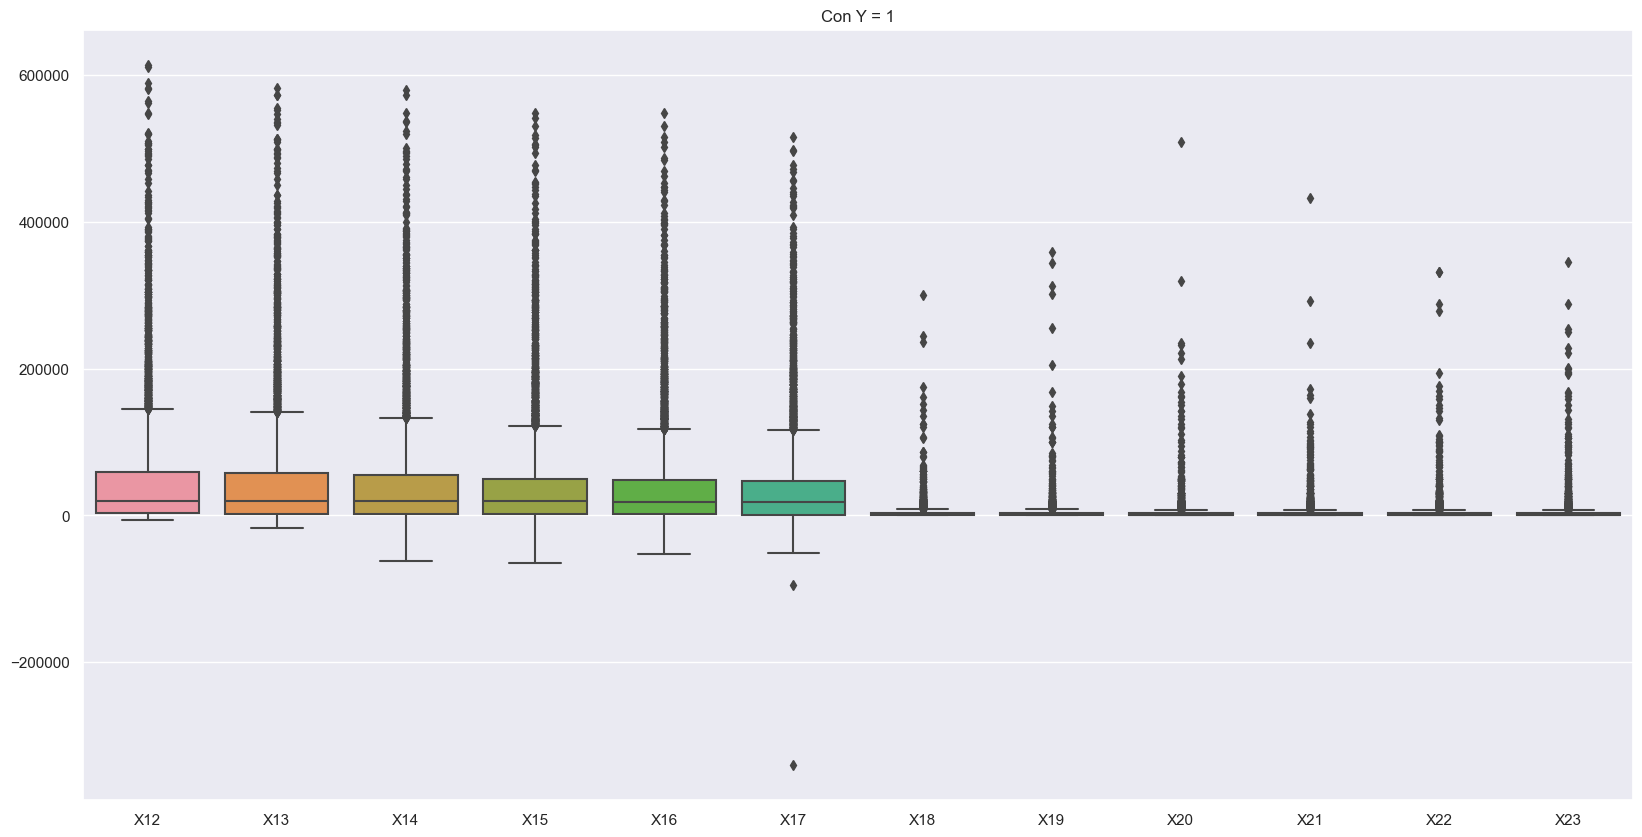

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sns.boxplot(df_original.loc[df_original.Y == 1 , ['X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20','X21', 'X22', 'X23']], orient='v')
_ = plt.title("Con Y = 1")

Como podemos ver los valores extremos se pueden notar en las personas que no pagan por lo que no pueden ser eliminados ni imputados ya que esta es la información que estamos buscando.

# PCA
Identificación de las variables con su covarianza

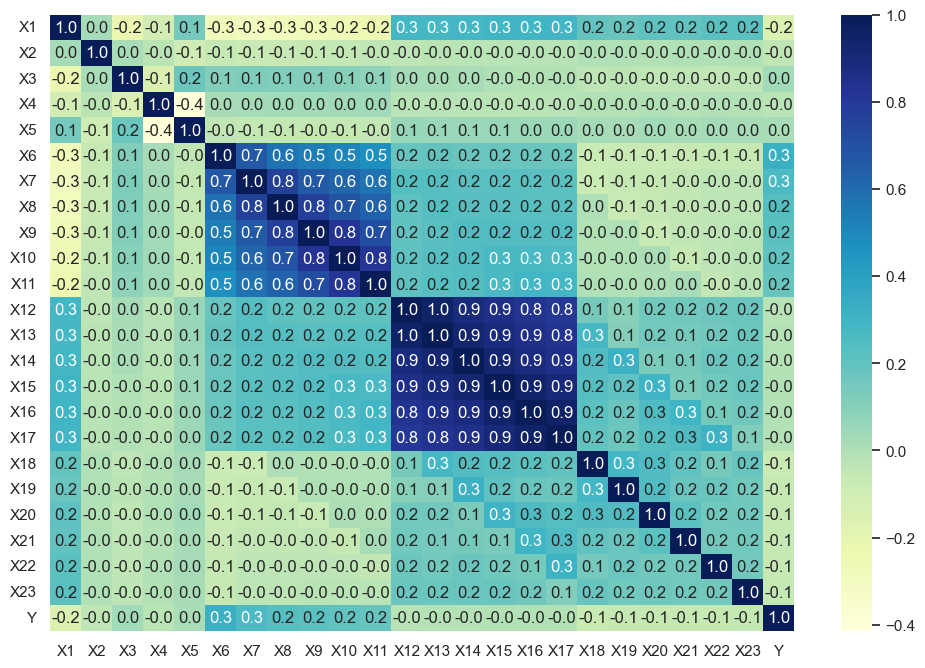

In [108]:
fig, ax = plt.subplots(figsize=(12 ,8))
_ = sns.heatmap(df_original.corr(), cmap= 'YlGnBu', annot= True, fmt= "0.1f")

Con este gráfico podemos ver que si hay variables que correlacionan tanto positiva como negativamente, esto nos dice que el análisis de componentes principales podrá eliminar dimensiones con facilidad.

Vamos a hacer la selección de los PCA primero con todos los valores para así poder seleccionar los que expliquen la varianza de mejor manera.

In [96]:
X = df_original.copy().drop('Y', axis= 1)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [119]:
from sklearn.decomposition import PCA

modelo_PCA = PCA()

In [123]:
resultado_PCA = modelo_PCA.fit(X)

Primero vamos a seleccionar todos los valores para poder ver cuales son los que explican más

In [149]:
exp_pca = pd.DataFrame({'Atributo':X.columns, 'Explicacion':resultado_PCA.explained_variance_ratio_, 'Var Acumulada': np.cumsum(resultado_PCA.explained_variance_ratio_)})
exp_pca.sort_values(by= 'Explicacion', ascending= False)

,Atributo,Explicacion,Var Acumulada
0,X1,0.61,0.61
1,X2,0.30,0.91
2,X3,0.03,0.94
3,X4,0.02,0.95
4,X5,0.01,0.96
5,X6,0.01,0.97
6,X7,0.01,0.98
7,X8,0.01,0.99
8,X9,0.01,0.99
9,X10,0.00,0.99


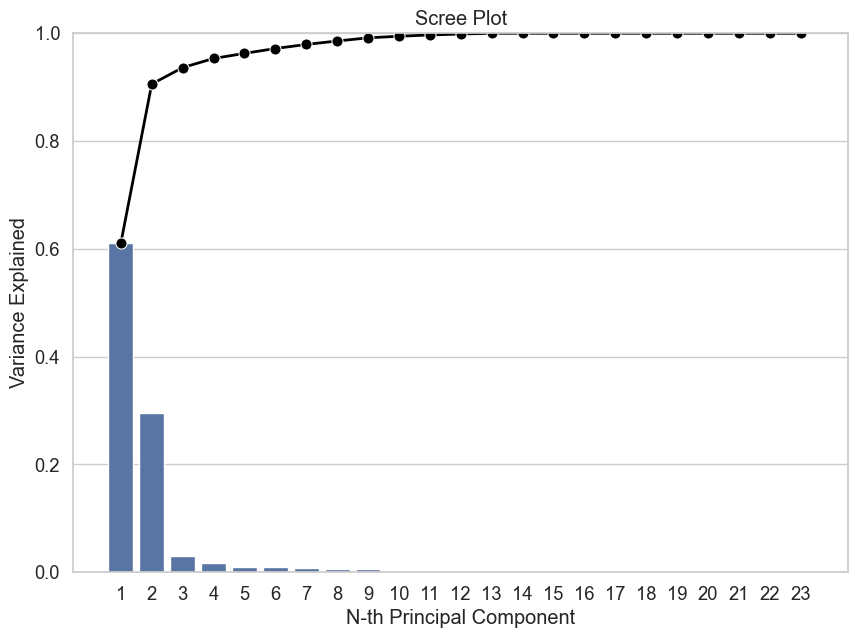

In [130]:
PC_components = np.arange(modelo_PCA.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = modelo_PCA.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(modelo_PCA.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Con esto podemos ver que dos de los columnas explican el 91% de la varianza son 
- $X_1$:= La cantidad del crédito 
- $X_2$:= El género

Por lo que serán esos dos componentes principales los que se tomarán